In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2022-11-15 18:38:10.131048: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-15 18:38:10.131069: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


train data:  (60000, 28, 28)
train labels:  (60000,)
test data:  (10000, 28, 28)
test labels:  (10000,)


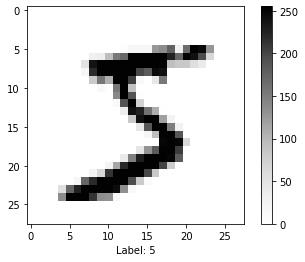

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
print('train data: ', train_images.shape)
print('train labels: ', train_labels.shape)

print('test data: ', test_images.shape)
print('test labels: ', test_labels.shape)

# Show sample image
plt.figure()
plt.imshow(train_images[0], cmap='Greys')
plt.xlabel('Label: ' + str(train_labels[0]))
plt.colorbar()
plt.grid(False)
plt.show()

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2022-11-15 18:38:12.624447: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-15 18:38:12.624479: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-15 18:38:12.624495: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lasha-PC): /proc/driver/nvidia/version does not exist
2022-11-15 18:38:12.624716: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.5806 - accuracy: 0.8605
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3630 - accuracy: 0.9124
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9300
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2390 - accuracy: 0.9400
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2371 - accuracy: 0.9421
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2176 - accuracy: 0.9458
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2061 - accuracy: 0.9503
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1925 - accuracy: 0.9532
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1860 - accuracy: 0.9539
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.189

In [5]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test set accuracy:', test_acc)

313/313 - 1s - loss: 0.2571 - accuracy: 0.9486 - 547ms/epoch - 2ms/step
Test set accuracy: 0.9485999941825867


4

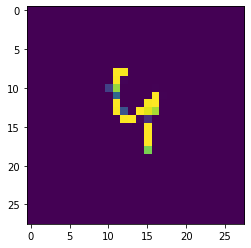

In [9]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

tsimage = plt.imread('4.jpeg')
tsimage = 255 - tsimage
tsimage = tf.image.rgb_to_grayscale(tsimage, name=None)
tsimage = tf.image.resize(tsimage, (28, 28))
tsimage = tf.squeeze(tsimage)

plt.imshow(tsimage)
tsimage = (np.expand_dims(tsimage,0))

prediction = probability_model.predict(tsimage)
np.argmax(prediction[0])


In [ ]:
model.save('models/mnist_model')